In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [ ]:
data=[]
labels=[]
Parasitized=os.listdir("/content/drive/My Drive/Colab Notebooks/Dataset/cell_images/Parasitized/")
for a in Parasitized:
    try:
        image=cv2.imread("/content/drive/My Drive/Colab Notebooks/Dataset/cell_images/Parasitized/"+a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((64, 64))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

Uninfected=os.listdir("/content/drive/My Drive/Colab Notebooks/Dataset/cell_images/Uninfected/")
for b in Uninfected:
    try:
        image=cv2.imread("/content/drive/My Drive/Colab Notebooks/Dataset/cell_images/Uninfected/"+b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((64, 64))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")

In [ ]:
Cells=np.array(data)
labels=np.array(labels)

In [ ]:
np.save("/content/drive/My Drive/Colab Notebooks/Cells64",Cells)
np.save("/content/drive/My Drive/Colab Notebooks/labels64",labels)

In [ ]:
Cells=np.load("/content/drive/My Drive/Colab Notebooks/Cells64.npy")
labels=np.load("/content/drive/My Drive/Colab Notebooks/labels64.npy")

In [ ]:
s=np.arange(Cells.shape[0])
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

In [ ]:
num_classes=len(np.unique(labels))
len_data=len(Cells)

In [ ]:
(x_train,x_test)=Cells[(int)(0.1*len_data):],Cells[:(int)(0.1*len_data)]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

In [ ]:
(y_train,y_test)=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

In [ ]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
 
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,  
        rotation_range=10,
        zoom_range = 0.1,  
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,  
        vertical_flip=False)  
 
datagen.fit(x_train)

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu",input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(1000,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 8, 8, 128)        

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x = x_train, y = y_train,
                    epochs = 20, validation_data = (x_test,y_test),
                    verbose = 1)

Epoch 1/20
776/776 [==============================] - 12s 16ms/step - loss: 0.2394 - accuracy: 0.8986 - val_loss: 0.1544 - val_accuracy: 0.9561
Epoch 2/20
776/776 [==============================] - 12s 15ms/step - loss: 0.1343 - accuracy: 0.9563 - val_loss: 0.1364 - val_accuracy: 0.9612
Epoch 3/20
776/776 [==============================] - 12s 15ms/step - loss: 0.1256 - accuracy: 0.9584 - val_loss: 0.1371 - val_accuracy: 0.9601
Epoch 4/20
776/776 [==============================] - 12s 15ms/step - loss: 0.1151 - accuracy: 0.9619 - val_loss: 0.1340 - val_accuracy: 0.9644
Epoch 5/20
776/776 [==============================] - 12s 15ms/step - loss: 0.1108 - accuracy: 0.9632 - val_loss: 0.1174 - val_accuracy: 0.9648
Epoch 6/20
776/776 [==============================] - 12s 15ms/step - loss: 0.1036 - accuracy: 0.9641 - val_loss: 0.1104 - val_accuracy: 0.9615
Epoch 7/20
776/776 [==============================] - 12s 15ms/step - loss: 0.0966 - accuracy: 0.9663 - val_loss: 0.1162 - val_accuracy:

In [ ]:
model.save("/content/drive/My Drive/Colab Notebooks/Baselinenet_reg64/BaselineNetReg64.h5")

In [ ]:
from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

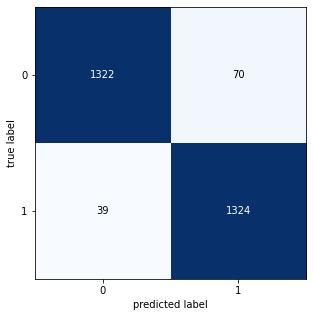

In [ ]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()